In [15]:
# global
homedir = "/u/az6922/"

import random
def generate_srclinkratearr(rttaverage,size,rseed=0):
    random.seed(rseed)
    rateaverage = (rttaverage-1)//2
    diffarr = [random.randint(-rateaverage+1, rateaverage) for _ in range(size)]
    # required_sum = rateaverage * size
    # current_sum = sum(ratearr)1_
    # last_rate = required_sum - current_sum
    # ratearr.append(last_rate)
    ratearr = [rateaverage+diff for diff in diffarr]
    return ratearr

import pickle
import os
def load_stats(dir,q=1,numqueues=2,numports=2,p=0):
    timelist = list()
    bufferpctlist = list()
    qlenlist = list()
    sentlist = list()
    thptlist = list()
    droplist = list()
    threslist = list()
    for i in range(numports * numqueues):
        qlenlist.append(list())
        sentlist.append(list())
        thptlist.append(list())
        droplist.append(list())
        threslist.append(list())

    with open(dir+"tor.tr", 'r') as f:
        lines = f.readlines()[1:-1]
        for line in lines:
            if line.startswith("\x00"): continue
            tokens = line.split()
            timestamp = int(tokens[0])
            buffer = float(tokens[2])
            for i in range(numports * numqueues):
                qlenlist[i].append(int(tokens[3+i*5]))
            for i in range(numports * numqueues):
                thptlist[i].append(float(tokens[3+i*5+1]))
            for i in range(numports * numqueues):
                sentlist[i].append(int(tokens[3+i*5+2]))
            for i in range(numports * numqueues):
                droplist[i].append(int(tokens[3+i*5+3]))
            for i in range(numports * numqueues):
                threslist[i].append(int(tokens[3+i*5+4]))
            timelist.append(timestamp)
            bufferpctlist.append(buffer)
    
    return [timelist,qlenlist[p*numqueues+q],sentlist[p*numqueues+q],thptlist[p*numqueues+q],droplist[p*numqueues+q],threslist[p*numqueues+q]]

def load_output_log(dir):
    # LOG +1.19381e+10ns 316500
    timelist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("LOG"): continue
            tokens = line.split()
            timelist.append(float(tokens[1].rstrip('ns')))
            minbufferlist.append(int(tokens[2]))
    return [timelist,minbufferlist]

def load_output_log_probe(dir):
    # +...ns(time),cmsa,sent,totalbw,n,m,b
    timelist = list()
    cmsalist = list()
    sentlist = list()
    targetlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            timelist.append(float(tokens[0].rstrip('ns')))
            cmsa=int(tokens[1])
            cmsalist.append(cmsa)
            sentlist.append(int(tokens[2]))
            totalbw=float(tokens[3])
            n=int(tokens[4])
            m=float(tokens[5])
            b=float(tokens[6])
            target=float(tokens[7].rstrip('\n'))
            targetlist.append(target)
    return [timelist,cmsalist,sentlist,targetlist]

def load_output_data(dir):
    # DATA,+1.1099e+11ns,93000,6241500,19500
    cmsalist = list()
    sentlist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("DATA"): continue
            tokens = line.split(',')
            cmsalist.append(int(tokens[2]))
            sentlist.append(int(tokens[3]))
            minbufferlist.append(int(tokens[4]))
    return [cmsalist,sentlist,minbufferlist]

def load_output_convergence(dir):
    # +5.54904e+10ns,39800,6243000,6243001,16500,97,0,0,0,39800,0
    # time,cmsa,sent,3,minbuffer,5,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    # timelist = list()
    # cmsalist = list()
    # sentlist = list()
    # minbufferlist = list()
    # mlist = list()
    # blist = list()
    # targetlist = list()
    # minfulllist = list()
    # maxnonfulllist = list()

    # +2.7799e+11ns,45,90950,6241500,6243001,4500,528,0,0,0,90950,90350
    # time,proberid,cmsa,sent,4,minbuffer,6,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    timedict = dict()
    cmsadict = dict()
    sentdict = dict()
    minbufferdict = dict()
    mdict = dict()
    bdict = dict()
    targetdict = dict()
    minfulldict = dict()
    maxnonfulldict = dict()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            if tokens[1]=="pass" or tokens[1]=="maxbuffer": continue
            proberid = int(tokens[1])
            if proberid not in timedict:
                timedict[proberid] = list()
                cmsadict[proberid] = list()
                sentdict[proberid] = list()
                minbufferdict[proberid] = list()
                mdict[proberid] = list()
                bdict[proberid] = list()
                targetdict[proberid] = list()
                minfulldict[proberid] = list()
                maxnonfulldict[proberid] = list()
            timedict[proberid].append(float(tokens[0].rstrip('ns')))
            cmsadict[proberid].append(int(tokens[2]))
            sentdict[proberid].append(int(tokens[3]))
            minbufferdict[proberid].append(int(tokens[5]))
            mdict[proberid].append(float(tokens[7]))
            bdict[proberid].append(float(tokens[8]))
            targetdict[proberid].append(float(tokens[9]))
            minfulldict[proberid].append(int(tokens[10]))
            maxnonfulldict[proberid].append(int(tokens[11]))
    # return [timelist,cmsalist,sentlist,minbufferlist,mlist,blist,targetlist,minfulllist,maxnonfulllist]
    return [timedict,cmsadict,sentdict,minbufferdict,mdict,bdict,targetdict,minfulldict,maxnonfulldict]

def load_bct(dir,numsender,startsender,simend,numburst):
    startlist = list()
    endlist = list()
    for i in range(numsender):
        with open(f"{dir}gpt_sender{i+startsender}_app0.tr",'r') as f:
            lines = f.readlines()
            for j in range(numburst):
                if len(lines) > j: startlist.append(int(lines[j].split()[0]))
                if len(lines) < numburst*2 and (len(lines)-numburst) < (j+1):
                    endlist.append(simend*1000000)
                else:
                    endlist.append(int(lines[j+numburst].split()[0]))
    return [startlist,endlist]

def load_gpt(dir,numsender):
    # 2100 FlowId 1000 TotalBytes 5611000 SocketState 4 TcpCongState 0 GoodputRxBytes 369240 ThisGoodputRxBytes 369240
    returnlist = list()
    for i in range(numsender):
        timemslist = list()
        thptlist = list()
        gptlist = list()
        with open(f"{dir}gpt_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            for line in lines:
                tokens = line.split()
                timemslist.append(int(tokens[0]))
                thptlist.append(int(tokens[4]))
                gptlist.append(int(tokens[10]))
        returnlist.append([timemslist,thptlist,gptlist])
    return returnlist

def load_fct(dir,numsender,startsender):
    # 51022105 FlowId 20000 TotalBytes 5241760
    # 71516996 FlowId 20000 TotalBytes 10000000
    returnlist = list()
    for i in range(startsender,startsender+numsender):
        with open(f"{dir}fct_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            if len(lines) < 2:
                returnlist.append(0)
            else:
                startfct = int(lines[0].split()[0])
                endfct = int(lines[1].split()[0])
                returnlist.append(endfct-startfct)
    return returnlist

def load_output_zero(fdir):
    intervallist = list()
    shouldstart = False
    with open(f"{fdir}output.tr",'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split(',')
            if shouldstart:
                intervalstart = int(tokens[0])
                interval = int(tokens[1])
                intervallist.append([intervalstart,intervalstart+interval])
            else:
                if tokens[0]=="DesignZeroVec":
                    shouldstart = True
    return intervallist

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

def linear_regression(xarr,yarr):
    x = np.array(xarr)
    y = np.array(yarr)

    # Number of data points
    N = len(x)

    # Calculate the slope (m) and intercept (b) using the formulas
    # m = (N * Σ(xi * yi) - Σxi * Σyi) / (N * Σ(xi^2) - (Σxi)^2)
    # b = (Σyi - m * Σxi) / N

    # Calculate sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate the slope (m) and intercept (b)
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / N

    # # Display the equation of the best-fit line
    # print(f"Slope: {m:.2f}, Intercept: {b:.2f}")

    # # Create the best-fit line using the model equation
    # y_pred = m * x + b

    return [m,b]

def get_targetbw(cca,nfstr,rttstr):
    with open(f"{homedir}Buffer/experiments/bulk_dec2624/cca{cca}_maxthpt.txt") as fread:
        lines = fread.readlines()
        for line in lines:
            tokens = line.split(',')
            if nfstr==tokens[0] and rttstr==tokens[1]:
                targetbw_raw = float(tokens[2])
                break
    targetbw = int(((targetbw_raw // 1500)+1) * 1500+1)
    return targetbw

def merge_intervals(intervals):
    if not intervals:
        return []

    merged = [intervals[0]]  # Start with the first interval

    for start, end in intervals[1:]:
        last_start, last_end = merged[-1]

        # If the end of the last interval matches the start of the new interval, merge them
        if last_end == start:
            merged[-1] = (last_start, end)  # Extend the last interval
        else:
            merged.append((start, end))  # Otherwise, add it as a new interval

    return merged

In [16]:
smoothwindow = 100
smoothcollection = 500
smooththreshold = 0
midbw = 1000
sim=200

ccaname="realmix"
numflowname="large"
rtt=300
confseed=0
configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
dbwname = "conf0"

In [17]:
with open(f'{homedir}az6922_data/pickle/deltabw_incomplete.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

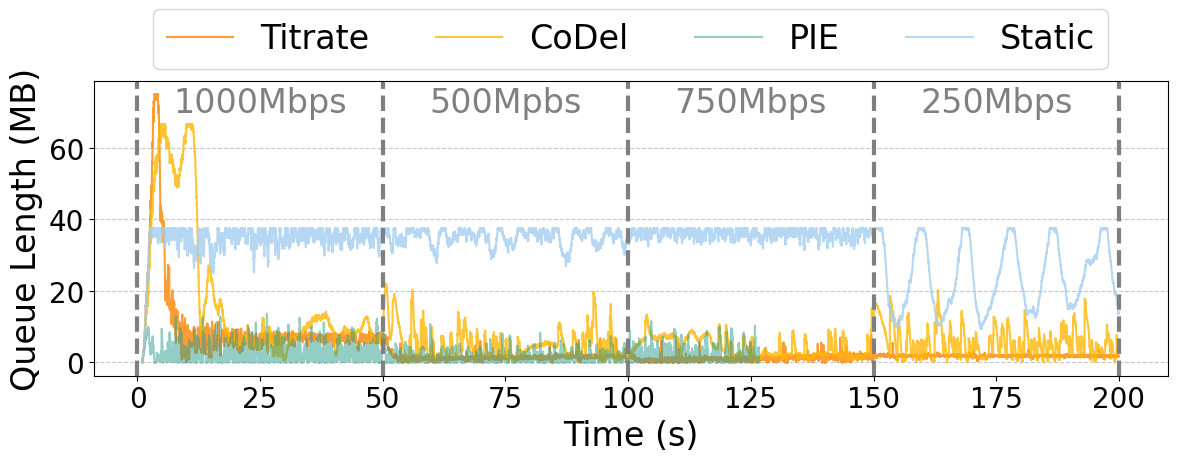

In [5]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
textarr = ["1000Mbps","500Mpbs","750Mbps","250Mbps"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
arrstart = 0
arrend = 200000 

plt.figure(figsize=(12,5))
for isch,scheme in enumerate(schemearr):
    datator = datadict[f"{configname}_{dbwname}"][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]

    alphav = 0.8
    if scheme=="pie": alphav=0.5
    plt.plot([x/1000000000 for x in time[1000:]],[x/1000000 for x in qlen[1000:]],label=schemenamearr[isch],color=colorarr[isch],alpha=alphav)

for it,t in enumerate(range(0, 201, 50)):
    plt.axvline(x=t, color='gray', linestyle='--', linewidth=3)

    if t < 200:
        midpoint = t + 25
        plt.text(midpoint, 68, textarr[it], ha='center', va='bottom', fontsize=24, color='gray')

plt.xlabel("Time (s)",fontsize=24)
plt.ylabel("Queue Length (MB)",fontsize=24)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc="upper center",ncol=6,bbox_to_anchor=(0.5,1.3),fontsize=24)
plt.tight_layout()
plt.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_deltabw/deltabw.pdf', bbox_inches='tight', dpi=500)
plt.show()

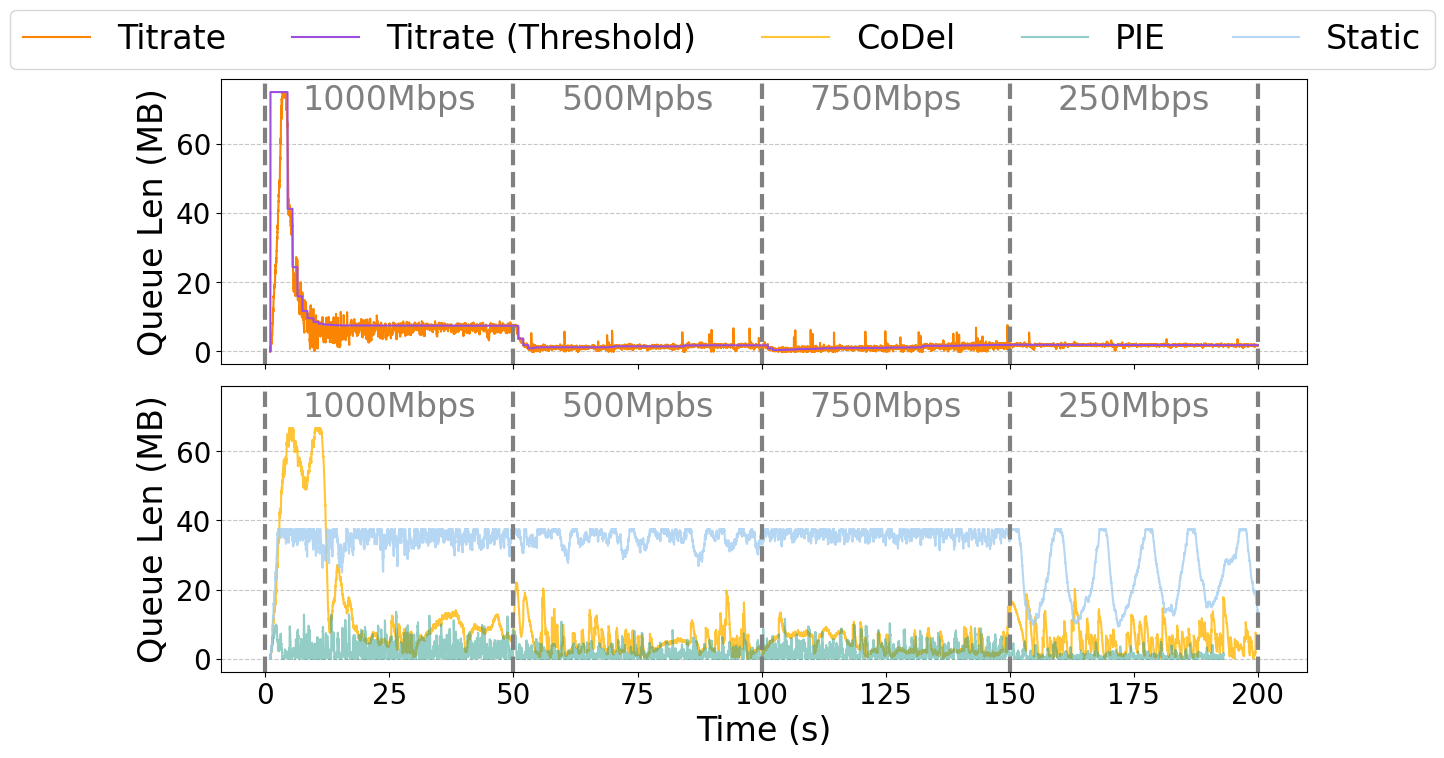

In [18]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
textarr = ["1000Mbps","500Mpbs","750Mbps","250Mbps"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
arrstart = 0
arrend = 200000 

nr = 2
nc = 1
fig,axs = plt.subplots(nr,nc,figsize=(12*nc,3.5*nr),sharex=True,sharey=True)
for isch,scheme in enumerate(schemearr):
    datator = datadict[f"{configname}_{dbwname}"][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]

    if scheme=="titrate":
        alphav=1
        axs[0].plot([x/1000000000 for x in time[1000:]],[x/1000000 for x in qlen[1000:]],label=schemenamearr[isch],color=colorarr[isch],alpha=alphav)
        axs[0].plot([x/1000000000 for x in time[1000:]],[x/1000000 for x in thres[1000:]],label="Titrate (Threshold)",color="#9d4edd",alpha=alphav)
    else:
        alphav = 0.8
        if scheme=="pie": alphav=0.5
        axs[1].plot([x/1000000000 for x in time[1000:]],[x/1000000 for x in qlen[1000:]],label=schemenamearr[isch],color=colorarr[isch],alpha=alphav)

for iaxs in [0,1]:
    for it,t in enumerate(range(0, 201, 50)):
        axs[iaxs].axvline(x=t, color='gray', linestyle='--', linewidth=3)

        if t < 200:
            midpoint = t + 25
            axs[iaxs].text(midpoint, 68, textarr[it], ha='center', va='bottom', fontsize=24, color='gray')

axs[1].set_xlabel("Time (s)",fontsize=24)
for iaxs in [0,1]:
    axs[iaxs].set_ylabel("Queue Len (MB)",fontsize=24)
    axs[iaxs].tick_params(axis='x', labelsize=20)
    axs[iaxs].tick_params(axis='y', labelsize=20)
    axs[iaxs].grid(axis='y', linestyle='--', alpha=0.7)
fig.legend(loc="upper center",ncol=6,bbox_to_anchor=(0.5,1.1),fontsize=24)
fig.tight_layout()
fig.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_deltabw/deltabw_timeseries.pdf', bbox_inches='tight', dpi=500)
fig.show()

titrate,50000,200000
titrate,100000,200000
titrate,150000,200000
titrate,200000,200000
codel,50000,200000
codel,100000,200000
codel,150000,200000
codel,200000,200000
pie,50000,193124
pie,100000,193124
pie,150000,193124
static,50000,200000
static,100000,200000
static,150000,200000
static,200000,200000


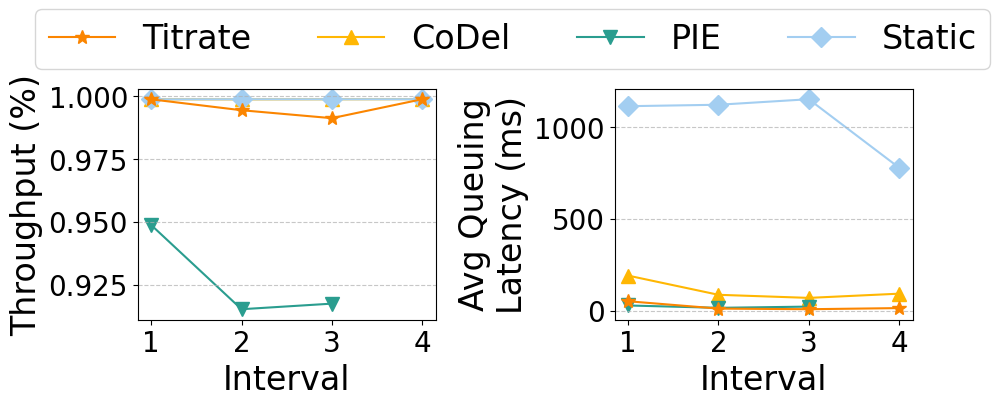

In [19]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
markerarr = ['*','^','v','D']
hatcharr = ["/","\\","x","-"]
bwarr=[1000,500,750,250]
arrstart = 0
arrend = 200000 

nr = 1
nc = 2
fig,axs = plt.subplots(nr,nc,figsize=(5*nc,3*nr))



thptlist = list()
for isch,scheme in enumerate(schemearr):
    datator = datadict[f"{configname}_{dbwname}"][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]

    thptlist.append(list())
    for start in [0,50000,100000,150000]:
        end = start+50000
        if start==0: start=10000
        if end<=len(thpt): thptlist[isch].append(sum(thpt[start:end])/(end-start))

# cthptlist = list()
# for l in thptlist:
#     cthptlist.append(sum(l)/len(l))
# lowererr = list()
# uppererr = list()
# for il,l in enumerate(thptlist):
#     lowererr.append(cthptlist[il]-min(l))
#     uppererr.append(max(l)-cthptlist[il])
# axs[0].bar(schemenamearr,cthptlist,yerr=[lowererr,uppererr],width=0.4,capsize=5,color=colorarr,hatch=hatcharr,edgecolor='grey')
for il,l in enumerate(thptlist):
    if il==0: 
        zorderv=2
    else:
        zorderv=1
    axs[0].plot(["1","2","3","4"][:len(l)],l,color=colorarr[il],marker=markerarr[il],markersize=10,zorder=zorderv)

# axs[0].set_ylim(0.6,None)
axs[0].set_xlabel("Interval",fontsize=24)
axs[0].set_ylabel("Throughput (%)",fontsize=24)
axs[0].tick_params(axis='x', labelsize=20)
axs[0].tick_params(axis='y', labelsize=20)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)





qlatlist = list()
for isch,scheme in enumerate(schemearr):
    datator = datadict[f"{configname}_{dbwname}"][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]

    qlatlist.append(list())
    for start in [0,50000,100000,150000]:
        end = start+50000
        if start==0: start=10000
        if end<=len(qlen): 
            print(f"{scheme},{end},{len(qlen)}")
            qlatlist[isch].append((sum(qlen[start:end])/(end-start))/(bwarr[isch]/8)/1000)

for il,l in enumerate(qlatlist):
    if il==0: 
        zorderv=2
    else:
        zorderv=1
    axs[1].plot(["1","2","3","4"][:len(l)],l,label=schemenamearr[il],color=colorarr[il],marker=markerarr[il],markersize=10,zorder=zorderv)

axs[1].set_xlabel("Interval",fontsize=24)
axs[1].set_ylabel("Avg Queuing\nLatency (ms)",fontsize=24)
axs[1].tick_params(axis='x', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
# axs[1].set_ylim(None,200)
# axs[1].set_yticks([0,50,100,150,200,1000,1100],[0,50,100,150,200,1000,1100])
fig.legend(loc="upper center",ncol=4,bbox_to_anchor=(0.5,1.2),fontsize=24)
fig.subplots_adjust(wspace=0.6)
# fig.tight_layout()
fig.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_deltabw/deltabw_thptqlat.pdf', bbox_inches='tight', dpi=500)
fig.show()